### Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
# filter warnings
warnings.filterwarnings('ignore')

#### Prepare datasets

In [2]:
# Load the inward remittance flows dataset
df = pd.read_csv('/content/remittance_inflows.csv', index_col = 0)

print(df.shape)
# Display the first few rows of the dataset
df.head()

(171, 34)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,%GDP_2022
Migrant remittance inflows (US$ million),,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,300.000000,350.000000,2.058824
Albania,0.00000,0.000000,151.8,332.000000,307.100000,427.3,550.900000,300.300000,504.140000,407.200000,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1718.320554,1800.000000,9.859772
Algeria,352.44176,232.990263,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1829.459057,0.977510
Angola,0.00000,0.000000,0.0,0.000000,0.000000,0.0,5.142000,0.000000,0.000000,0.000000,...,30.971119,11.114712,3.988048,1.418196,1.579247,3.445473,8.053051,12.631149,16.420494,0.013158
Antigua and Barbuda,9.40000,0.000000,0.0,7.925926,8.614815,0.0,8.940741,9.537037,18.755556,18.394444,...,32.100000,31.244412,26.705676,24.020044,32.768265,36.955426,36.331448,50.142028,34.590023,2.044328


In [3]:
inflow = df.copy()

##Modelling

In [4]:
# Split the data into input and target variables
X = inflow.drop(columns=['%GDP_2022'], axis=1) # Features
y = inflow['%GDP_2022'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Train shape:', X_train.shape) 
print('Test shape:', X_test.shape)

Train shape: (136, 33)
Test shape: (35, 33)


## Define functions for the models and train on the normalized data

### Linear Regression Model

In [5]:
# Linear regression model
def linear_regression_model(X_trian, y_train, X_test, y_test):
    # Train a linear regression model on the normalized data
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
   
    return mae, mse, rmse

### Random Forest Model

In [6]:
# Random Forest model
def random_forest_model(X_train, y_train, X_test, y_test):
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse

### XGBoost Model

In [7]:
def xgboost_model(X_train, y_train, X_test, y_test):
    # Train an XGBoost model on the normalized data
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
    xgb_model = xgb.train(params, dtrain, num_boost_round=100)

    # Evaluate the model performance on the testing set
    y_pred = xgb_model.predict(dtest)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### Ridge Regression Model

In [8]:
# Ridge regression
def ridge_regression(X_train, y_train, X_test, y_test):
    # Train a ridge regression model on the normalized data
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = ridge.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### Lasso Regression Model

In [9]:
# Lasso Regression
def lasso_regression(X_train, y_train, X_test, y_test):
    # Train a ridge regression model on the normalized data
    lasso = Lasso(alpha=1.0)
    lasso.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = lasso.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### SVR Model

In [10]:
# SVR model function
def svr_model(X_train, y_train, X_test, y_test):
    # Train an SVR model on the normalized data
    svr = SVR(kernel='rbf', C=1.0, gamma='scale')
    svr.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = svr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

### SGD model

In [11]:
from sklearn.linear_model import SGDRegressor
def sgd_model(X_train, y_train, X_test, y_test):
    # Train an SVR model on the normalized data
    sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
    sgd_model.fit(X_train, y_train)

    # Evaluate the model performance on the testing set
    y_pred = sgd_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

## Evaluating the performance metrics of the models

In [12]:
# Call the linear regression model function
lr_mae, lr_mse, lr_rmse = linear_regression_model(X_train, y_train, X_test, y_test)

# Call the random forest model function
rf_mae, rf_mse, rf_rmse = random_forest_model(X_train, y_train, X_test, y_test)

# Call the XGBoost model function
xgb_mae, xgb_mse, xgb_rmse = xgboost_model(X_train, y_train, X_test, y_test)

# Call the Ridge model function
ridge_mae, ridge_mse, ridge_rmse = ridge_regression(X_train, y_train, X_test, y_test)
                                             
# Call the Lasso model function
lasso_mae, lasso_mse, lasso_rmse = lasso_regression(X_train, y_train, X_test, y_test)

# Call the SVR model function
svr_mae, svr_mse, svr_rmse = svr_model(X_train, y_train, X_test, y_test)

# Call the SGD model function
sgd_mae, sgd_mse, sgd_rmse = sgd_model(X_train, y_train, X_test, y_test)

In [13]:
# Create a dictionary with the evaluation metrics for each model
metrics = {
    'Linear Regression': [lr_mae, lr_mse, lr_rmse],
    'Random Forest': [rf_mae, rf_mse, rf_rmse],
    'XGBoost': [xgb_mae, xgb_mse, xgb_rmse],
    'Ridge': [ridge_mae, ridge_mse, ridge_rmse],
    'Lasso': [lasso_mae, lasso_mse, lasso_rmse],
    'SVR': [svr_mae, svr_mse, svr_rmse],
    'SGD': [sgd_mae, sgd_mse, sgd_rmse]
}

# Create a pandas dataframe from the dictionary
df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['MAE', 'MSE', 'RMSE'])

# Print the dataframe
df_metrics

,MAE,MSE,RMSE
Linear Regression,5.892203,61.148973,7.819781
Random Forest,4.818888,48.982562,6.998754
XGBoost,5.306699,60.191991,7.758350
Ridge,5.253557,45.058726,6.712580
Lasso,5.507718,47.603492,6.899528
SVR,3.817812,51.180846,7.154079
SGD,5.302481,44.908734,6.701398


Based on the output, the **Random Forest** model has the lowest MAE, MSE, and RMSE values, indicating that it has the best performance among the models listed. The SVR model also has relatively low values for all three metrics, indicating good performance as well. 

## Hyperparameter Tuning using GridSearchCV

In [14]:
# define the random forest model
rf = RandomForestRegressor()

# define the hyperparameters and their possible values
param_grid = {'n_estimators': [50, 100, 200, 500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [15]:
# define the grid search cross-validation object
rf_grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
rf_grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", rf_grid_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [16]:
# use the best hyperparameters to train the model
rf_best = RandomForestRegressor(**rf_grid_search.best_params_)
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=50)

In [17]:
# define the SVR model
svr = SVR()

# define the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto']}

In [18]:
# define the grid search cross-validation object
svr_grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
svr_grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", svr_grid_search.best_params_)

Best hyperparameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [19]:
# use the best hyperparameters to train the model
svr_best = SVR(**svr_grid_search.best_params_)
svr_best.fit(X_train, y_train)

SVR(C=10, gamma='auto')

In [20]:
# Print the best hyperparameters and score for each model
print('Random Forest:')
print('Best Score:', rf_grid_search.best_score_)
print('==='* 10)

print('SVR:')
print('Best Score:', svr_grid_search.best_score_)
print('==='* 10)

Random Forest:
Best Score: -0.025180671245138876
SVR:
Best Score: -0.11755055020046243


The Random Forest model  best score was -0.025180671245138876. This means that the mean squared error of the Random Forest model on the validation data was around 0.025, which is quite low and indicates that the model has good predictive performance.

### Random Forest model prediction on the test set

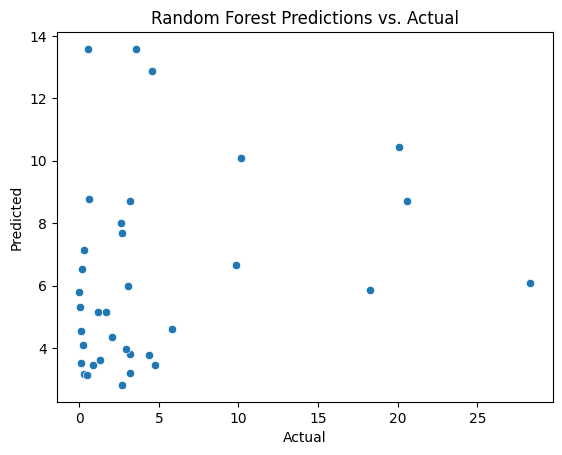

In [29]:
# Get the predictions of the Random Forest model on the test set
rf_preds = rf_grid_search.predict(X_test)

# Plot the actual vs. predicted values using a scatter plot
sns.scatterplot(x=y_test, y=rf_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Predictions vs. Actual');

Text(0.5, 1.0, 'Random Forest residual distribution')

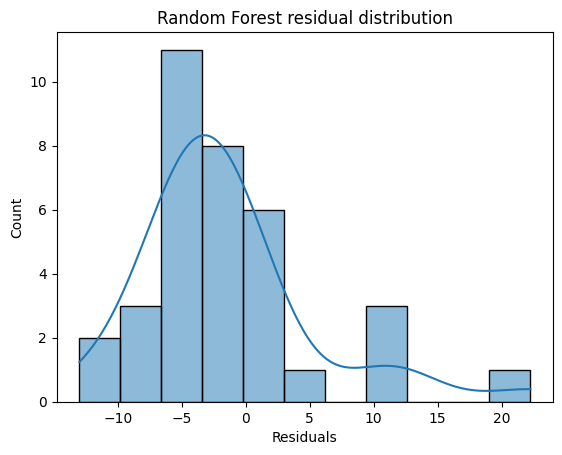

In [22]:
# Compute the residuals
rf_resids = y_test - rf_preds

# Plot the distribution of residuals using a histogram
sns.histplot(rf_resids, kde=True)
plt.xlabel('Residuals')
plt.title('Random Forest residual distribution')

### SVR model

Text(0.5, 1.0, 'SVR predictions vs. actual')

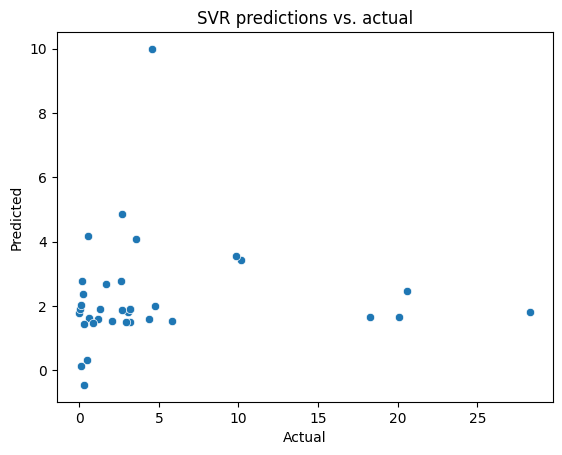

In [24]:
# Predictions of SVR model on the tests set
svr_preds = svr_grid_search.predict(X_test)
sns.scatterplot(x=y_test, y=svr_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR predictions vs. actual')

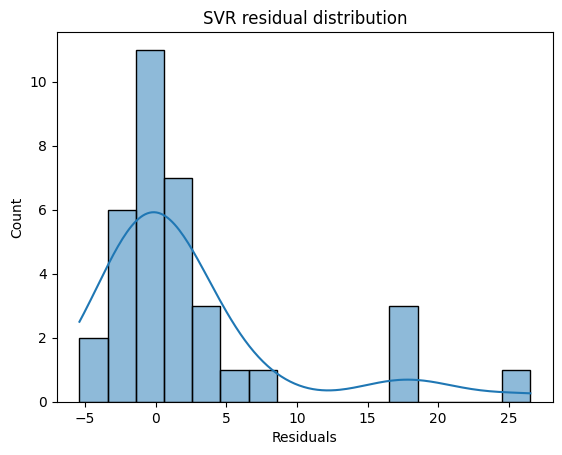

In [25]:
# Compute the residuals for SVR model
svr_resids = y_test - svr_preds
# Plot the histogram of SVR residual distribution
sns.histplot(svr_resids, kde=True)
plt.xlabel('Residuals')
plt.title('SVR residual distribution')

plt.show()